In [32]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm

In [54]:
flights=pd.read_csv("/Users/aman.sawarn/Downloads/GraphCourse_DemoData_ArangoDB-2/flights.csv")
airports=pd.read_csv("/Users/aman.sawarn/Downloads/GraphCourse_DemoData_ArangoDB-2/airports.csv")

In [55]:
flights['_from']=flights['_from'].apply(lambda x : x.split("/")[1])
flights['_to']=flights['_to'].apply(lambda x : x.split("/")[1])

In [56]:
flights.head()

,_from,_to,Year,Month,Day,DayOfWeek,DepTime,ArrTime,DepTimeUTC,ArrTimeUTC,UniqueCarrier,FlightNum,TailNum,Distance
0,ATL,CHS,2008,1,1,2,2,57,2008-01-01T05:02:00.000Z,2008-01-01T05:57:00.000Z,FL,579,N937AT,259
1,CLE,SAT,2008,1,1,2,3,230,2008-01-01T05:03:00.000Z,2008-01-01T08:30:00.000Z,XE,2895,N14158,1241
2,IAD,CLE,2008,1,1,2,5,132,2008-01-01T05:05:00.000Z,2008-01-01T06:32:00.000Z,YV,7185,N592ML,288
3,JFK,PBI,2008,1,1,2,8,332,2008-01-01T05:08:00.000Z,2008-01-01T08:32:00.000Z,B6,859,N505JB,1028
4,CVG,MHT,2008,1,1,2,9,215,2008-01-01T05:09:00.000Z,2008-01-01T07:15:00.000Z,OH,5169,N669CA,741


In [57]:
airports.head()

,_key,name,city,state,country,lat,long,vip
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505,False
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928,False
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893,False
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081,False
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944,False


In [58]:
print("Total Airports and features : ", airports.shape)
print("Total flights and features : ", flights.shape)

Total Airports and features :  (3375, 8)
Total flights and features :  (286463, 14)


In [59]:
G=nx.Graph()

In [74]:
edges=[]

count=0
for index,row in tqdm(flights.iterrows()):
    edges.append((row['_from'], row['_to']))
    count+=1
    if count>=30:
        break


29it [00:00, 214.44it/s]


In [75]:
G.add_edges_from(edges)

In [76]:
len(edges)

30

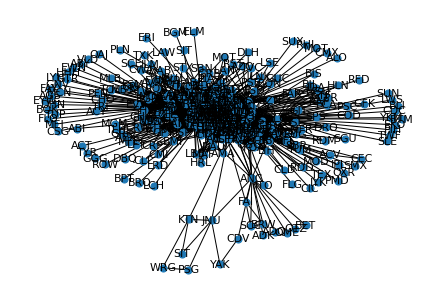

In [79]:
## Plotting for 1st n records
nx.draw(G, with_labels = True, node_size=50,font_size=11)

286463it [00:11, 25691.42it/s]


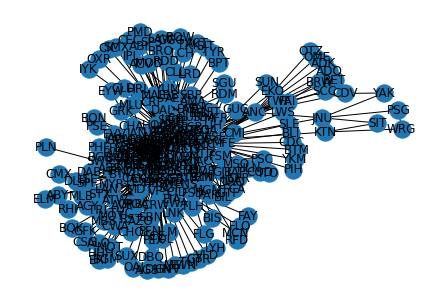

In [64]:
edges=[]

for index,row in tqdm(flights.iterrows()):
    edges.append((row['_from'], row['_to']))
G.add_edges_from(edges)    
## Plotting for all records
nx.draw(G, with_labels = True)

## average degree